In [61]:
from __future__ import print_function, division
import pandas as pd
import pylab as plt
import sqlite3
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [48]:
%ls ../data/bimbo/

train.csv*     train.csv.zip


In [86]:
indir = "../data/bimbo/"
conn = sqlite3.connect(indir + "bimbo.db")
dbfile = indir + "bimbo.db"
# from sqlalchemy import create_engine

# conn = create_engine(
#    'sqlite:///' + dbfile,
# )

Engine(sqlite:///../data/bimbo/bimbo.db)

In [123]:
df = pd.read_csv(indir + "train.csv", index_col=[0,1], nrows=10000)
df.groupby("Producto_ID").agg("sum")["Venta_uni_hoy"].sort_values()[-5:].index

Int64Index([1146, 1250, 2233, 2604, 33794], dtype='int64', name='Producto_ID')

In [81]:
pd.read_sql?

In [92]:
df = pd.read_sql_query(
    """SELECT * FROM bimbo_train 
    WHERE Producto_ID=214 
    AND Cliente_ID IN (4690490, 1697938, 4499368, 2373899, 1361323)
    ;"""
                       , conn, chunksize=None)
# df = pd.read_csv(indir + "train.csv", index_col=[0,1], nrows=1000)
print(df.shape)
df.columns

(35, 11)


Index(['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima',
       'Dev_proxima', 'Demanda_uni_equil'],
      dtype='object')

In [124]:
df = pd.read_sql_query(
    """SELECT Semana, Producto_ID, SUM(Venta_uni_hoy) FROM bimbo_train 
    WHERE Producto_ID IN (1146, 1250, 2233, 2604, 33794)
    GROUP BY Semana, Producto_ID
    ;"""
                       , conn, chunksize=None)
# df = pd.read_csv(indir + "train.csv", index_col=[0,1], nrows=1000)
print(df.shape)
df.columns

(35, 3)


Index(['Semana', 'Producto_ID', 'SUM(Venta_uni_hoy)'], dtype='object')

In [125]:
dfpiv = df.pivot_table(values = 'SUM(Venta_uni_hoy)', index="Semana", columns="Producto_ID")

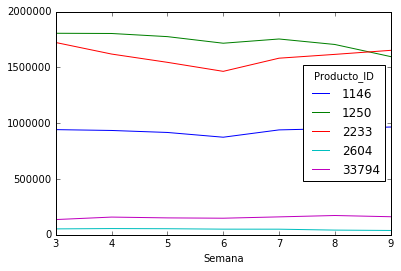

In [126]:
# (dfpiv/dfpiv.mean()).plot()
dfpiv.plot()

In [ ]:
df = pd.read_sql_query(
    """SELECT SUM(Venta_uni_hoy) FROM bimbo_train 
    WHERE Producto_ID=214 
    AND Cliente_ID IN (4690490, 1697938, 4499368, 2373899, 1361323)
    GROUP BY Semana
    ;"""
                       , conn, chunksize=None)
# df = pd.read_csv(indir + "train.csv", index_col=[0,1], nrows=1000)
print(df.shape)
df.columns

In [91]:
df.groupby("Cliente_ID",).agg(sum)["Venta_hoy"].sort_values()[-5:].index.tolist()

[4690490, 1697938, 4499368, 2373899, 1361323]

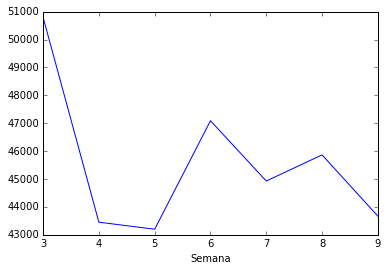

In [95]:
df.groupby("Semana",).agg(sum)["Venta_hoy"].plot()

In [94]:
feature_names = ['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID']
df[feature_names]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,3,1110,7,3301,4499368,214
1,3,1139,7,3313,1361323,214
2,3,1143,8,3425,2373899,214
3,3,1934,11,3924,4690490,214
4,3,3223,7,3344,1697938,214
5,4,1110,7,3301,4499368,214
6,4,1139,7,3313,1361323,214
7,4,1143,8,3425,2373899,214
8,4,1934,11,3924,4690490,214
9,4,3223,7,3344,1697938,214


In [47]:
# (dfint.T - dfint.loc[:,1]).T
# dfint.mean()
# dfint.var()

(0, 600)

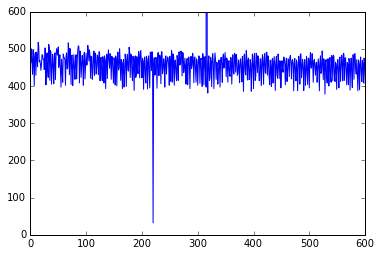

In [31]:
plt.plot(dfampl.loc[2])
# plt.yscale("log")
plt.ylim([0, 600])